In [21]:
import pandas as pd
import numpy as np

from helper.helper_functions import get_sentence_tachkil
from helper.prosody_postprocessing import prosody_form
from helper.aroud_helper import get_aroud, get_wazn
from taksim_aroud import get_full_aroud
from consts.awzan import AWZAN_ar2en

In [4]:
data = pd.read_csv('~/Script/deep_learning/arabic/poem_NLG/Arabic_poem_reduced.csv').dropna()

In [6]:
original = []
meters = []

seuil = 0.55

for i in range(len(data)):

    if i % 100000 == 0:
        print(i, len(data), len(original))

    line = data.iloc[i]
    right, left, meter = line['الشطر الايمن'], line['الشطر الايسر'], line['البحر']
    
    try:
        clean_r, tachkil_r, ratio_r  = get_sentence_tachkil(right)
        if ratio_r > seuil:
            original.append(right)
            meters.append(meter)
    except:
        print('1', i)
        
    try:
        clean_l, tachkil_l, ratio_l  = get_sentence_tachkil(left)
        if ratio_l > seuil:
            original.append(left)
            meters.append(meter)
    except:
        print('2', i)
    

0 1684668 0
100000 1684668 15891
200000 1684668 30383
300000 1684668 40354
400000 1684668 49431
500000 1684668 63056
600000 1684668 76536
700000 1684668 114091
800000 1684668 127741
900000 1684668 142374
1000000 1684668 146172
1100000 1684668 148415
1200000 1684668 149086
1300000 1684668 151720
1400000 1684668 155854
1500000 1684668 161272
1600000 1684668 161515
2 1645162


In [26]:
x, y, r = [], [], []

In [29]:
i = 0
x, y, r = [], [], []

for line, meter in zip(original, meters):
    
    if i % 10000 == 0:
        print(i, len(original), len(x))

    if meter in AWZAN_ar2en:
        m = AWZAN_ar2en[meter]
        a = prosody_form(line)

        out2 = get_wazn(a, selected_meter=m)
        meter, wazn, ratio = out2['meter'], out2['wazn'], out2['ratio']

        x.append(line)
        y.append(wazn)
        r.append(ratio)

    i += 1

    

0 164256 0
10000 164256 9996
20000 164256 19866
30000 164256 29834
40000 164256 39775
50000 164256 49730
60000 164256 59590
70000 164256 69560
80000 164256 79511
90000 164256 89511
100000 164256 99511
110000 164256 109501
120000 164256 119380
130000 164256 129341
140000 164256 138581
150000 164256 148341
160000 164256 158223


In [35]:
y_ = list(set(y))

In [39]:
d =  {i: y.count(i) for i in y_}

In [47]:
sorted(d.items(), key=lambda kv: kv[1], reverse=True)

[('فَعُولُ مَفَاعِيلُنْ فَعُولُ مَفَاعِلُنْ', 9296),
 ('فَعُولُنْ مَفَاعِيلُنْ فَعُولُ مَفَاعِلُنْ', 8254),
 ('فَعُولُ مَفَاعِيلُنْ فَعُولُنْ مَفَاعِلُنْ', 7774),
 ('فَعُولُنْ مَفَاعِيلُنْ فَعُولُنْ مَفَاعِلُنْ', 7438),
 ('مُتْفَاعِلُنْ مُتَفَاعِلُنْ مُتَفَاعِلُنْ', 6560),
 ('مُتَفَاعِلُنْ مُتَفَاعِلُنْ مُتَفَاعِلُنْ', 6080),
 ('مُتَفَاعِلُنْ مُتْفَاعِلُنْ مُتَفَاعِلُنْ', 5821),
 ('مُتْفَاعِلُنْ مُتْفَاعِلُنْ مُتَفَاعِلُنْ', 5410),
 ('مُفَاعَلَتُنْ مُفَاعَلَتُنْ فَعُولُنْ', 4556),
 ('مُتْفَاعِلُنْ مُتَفَاعِلُنْ مُتْفَاعِلُنْ', 3678),
 ('مُسْتَفْعِلُنْ فَاعِلُنْ مُسْتَفْعِلُنْ فَعِلُنْ', 3603),
 ('مُتَفَاعِلُنْ مُتَفَاعِلُنْ مُتْفَاعِلُنْ', 3384),
 ('مُسْتَفْعِلُنْ فَعِلُنْ مُسْتَفْعِلُنْ فَعِلُنْ', 3265),
 ('مُفَاعَلْتُنْ مُفَاعَلَتُنْ فَعُولُنْ', 3221),
 ('فَعِلَاتُنْ مُسْتَفْعِلُنْ فَعِلَاتُنْ', 3179),
 ('مُفَاعَلَتُنْ مُفَاعَلْتُنْ فَعُولُنْ', 3027),
 ('مُتَفْعِلُنْ فَاعِلُنْ مُسْتَفْعِلُنْ فَعِلُنْ', 2973),
 ('مُتَفْعِلُنْ فَعِلُنْ مُسْتَفْعِلُنْ فَعِلُنْ', 2579),
 ('مُتَفَاعِلُنْ 

In [49]:
import seaborn as sns

/home/thesun/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

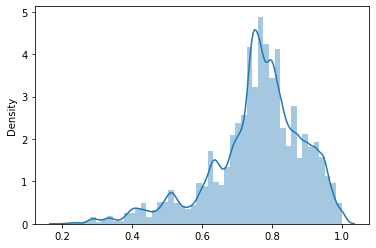

In [53]:
sns.distplot(r)

In [54]:
D = pd.DataFrame()
D['line'] = x
D['wazn'] = y
D['ratio'] = r

In [55]:
D.to_csv('aroud_dataset.csv', index=False)